---

# Generic Conditional Laws for Random-Fields - via:

## Universal $\mathcal{P}_1(\mathbb{R})$-Deep Neural Model (Type A)

---

By: [Anastasis Kratsios](https://people.math.ethz.ch/~kratsioa/) - 2021.

---

# Training Algorithm:
---
## 1) Generate Data:
Generates the empirical measure $\sum_{n=1}^N \delta_{X_T(\omega_n)}$ of $X_T$ conditional on $X_0=x_0\in \mathbb{R}$ *($x_0$ and $T>0$ are user-provided)*.

## 2) Get "Sample Barycenters":
Let $\{\mu_n\}_{n=1}^N\subset\mathcal{P}_1(\mathbb{R}^d)$.  Then, the *sample barycenter* is defined by:
1. $\mathcal{M}^{(0)}\triangleq \left\{\hat{\mu}_n\right\}_{n=1}^N$,
2. For $1\leq n\leq \mbox{N sample barycenters}$: 
    - $
\mu^{\star}\in \underset{\tilde{\mu}\in \mathcal{M}^{(n)}}{\operatorname{argmin}}\, \sum_{n=1}^N \mathcal{W}_1\left(\mu^{\star},\mu_n\right),
$
    - $\mathcal{M}^{(n)}\triangleq \mathcal{M}^{(n-1)} - \{\mu^{\star}\},$
*i.e., the closest generated measure form the random sample to all other elements of the random sample.*

---
**Note:** *We simplify the computational burden of getting the correct classes by putting this right into this next loop.*

## 3) Train Deep Classifier:
$\hat{f}\in \operatorname{argmin}_{f \in \mathcal{NN}_{d:N}^{\star}} 
\sum_{x \in \mathbb{X}}
\, 
\mathbb{H}
\left(
    \operatorname{Softmax}_N\circ f(x)_n| I\left\{W_1(\hat{\mu}_n,\mu_x),\inf_{m\leq N} W_1(\hat{\mu}_m,\mu_x)\right\}
\right);
$
where $\mathbb{H}$ is the categorical cross-entropy.  

---
---
---
## Notes - Why the procedure is so computationally efficient?
---
 - The sample barycenters do not require us to solve for any new Wasserstein-1 Barycenters; which is much more computationally costly,
 - Our training procedure never back-propages through $\mathcal{W}_1$ since steps 2 and 3 are full-decoupled.  Therefore, training our deep classifier is (comparatively) cheap since it takes values in the standard $N$-simplex.

---

## Meta-Parameters

### Simulation

#### Ground Truth:
*The build-in Options:*
- rSDE 
- pfBM
- 2lnflow

In [1]:
# Option 1:
groud_truth = "rSDE"
# Option 2:
# groud_truth = "2lnflow"
## Option 3:
# groud_truth = "pfBM"

#### Grid Hyperparameter(s)

In [2]:
## Monte-Carlo
N_Euler_Maruyama_Steps = 100
N_Monte_Carlo_Samples = 10**2
N_Monte_Carlo_Samples_Test = 10**3 # How many MC-samples to draw from test-set?

# End times for Time-Grid
T_end = 1
T_end_test = 1.1


## Grid
N_Grid_Finess = 100
Max_Grid = 0.5
x_0 = 1

# Number of Centers (\hat{\mu}_s)
N_Quantizers_to_parameterize = 10

This option sets $\delta$ in $B_{\mathbb{R}\times [0,\infty)}(\hat{x}_n,\delta)$; where $\hat{x}_n\in \nu_{\cdot}^{-1}[\hat{\mu}]$.  N_measures_per_center sets the number of samples to draw in this ball...by construction the training set is $\delta$-bounded and $\nu_{(x,t)}$, for any such $x$ is $\omega_{\nu_{\cdot}}(\delta)$-bounded in $\mathcal{P}_1(\mathbb{R})$.

In [3]:
# Hyper-parameters of Cover
delta = 0.1
N_measures_per_center = 100

**Note**: Setting *N_Quantizers_to_parameterize* prevents any barycenters and sub-sampling.

#### Mode: Code-Testin Parameter(s)
- True: $\Rightarrow$ cross validation through grid of very mild parameters just to test hardward or software.
- False: $\Rightarrow$ run CV-grid.

In [4]:
trial_run = True

### Meta-parameters
Ratio $\frac{\text{Testing Datasize}}{\text{Training Datasize}}$.

In [5]:
test_size_ratio = .25

## Simulation from Rough SDE
Simulate via Euler-M method from:
$$ 
X_T^x = x + \int_0^T \alpha(s,X_s^x)ds + \int_0^T((1-\eta)\beta(s,X_s^s)+\eta\sigma_s^H)dW_s.
$$

### Drift

In [6]:
def alpha(t,x):
    return np.exp(-x)+ np.cos(t)

### Volatility

In [7]:
def beta(t,x):
    return 0.01*x+t*np.sin(x)

### Roughness Meta-parameters
 - Roughness is $H$,
 - Ratio_fBM_to_typical_vol is $\eta$.

In [8]:
Rougness = 0.9 # Hurst Parameter
Ratio_fBM_to_typical_vol = 0 # $\eta$ in equation above.

## Simulation from Measure-Valued $2$-Parameter Log-Gaussian Flow
$$
X_{t,x} \sim \log\text{-}\mathcal{N}\left(\alpha(t,x),\beta(t,x)\right).
$$

**Note:** *$\alpha$ and $\beta$ are specified below in the SDE Example*.

In [9]:
# Run Backend
# %run Universal_Processes_Trainer_BACKEND.ipynb
exec(open('Universal_Processes_Trainer_BACKEND.py').read())

Using TensorFlow backend.
  0%|          | 0/3 [00:00<?, ?it/s]

Deep Feature Builder - Ready
Deep Classifier - Ready
Building Training + Testing Set - rough-SDE Ground-Truth


100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

Deep Feature Builder - Ready
Deep Classifier - Ready
Training Classifer Portion of Type-A Model
Fitting 2 folds for each of 1 candidates, totalling 2 fits



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    3.6s finished


Epoch 1/50
8/8 [==============================] - 0s 948us/step - loss: 1.0558 - accuracy: 0.3422
Epoch 2/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0332 - accuracy: 0.3867
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 1.0148 - accuracy: 0.5200
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9969 - accuracy: 0.6667
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9797 - accuracy: 0.6667
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9644 - accuracy: 0.6667
Epoch 7/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9496 - accuracy: 0.6667
Epoch 8/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9351 - accuracy: 0.6667
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9213 - accuracy: 0.6622
Epoch 10/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9065 - accuracy: 0.6622
Epoch 11/50
8/8 [====================

  0%|          | 0/224 [00:00<?, ?it/s]

Training Classifer Portion of Type-A Model: Done!
#---------------------------------------#
Building Training Set (Regression): START
#---------------------------------------#
#-------------------------------------#
Building Training Set (Regression): END
#-------------------------------------#
#-------------------------------------#
Building Test Set (Predictions): START
#-------------------------------------#
#-----------------------------------#
Building Test Set (Predictions): END
#-----------------------------------#
#-----------------------------#
Building Barycenters Set: START
#-----------------------------#
#-----------------------------#
Building Barycenters Set: END
#-----------------------------#
Building Training Set Performance Metrics


100%|██████████| 75/75 [00:00<00:00, 2567.40it/s]


Building Test Set Performance Metrics
#----------------------#
Training-Set Performance
#----------------------#
           W1  E[X']-E[X]  (E[X'^2]-E[X^2])^.5  (E[X'^3]-E[X^3])^(1/3)  \
Min  0.018822    0.000211         1.989923e-08                0.073230   
MAE  0.043736    0.082477         3.639457e-02                0.587634   
Max  0.079817    0.198627         1.832663e-01                0.889922   

     (E[X'^4]-E[X^4])^.25  
Min              0.170772  
MAE              0.721311  
Max              1.011584  
 
 
 
#------------------#
Test-Set Performance
#------------------#
           W1  E[X']-E[X]  (E[X'^2]-E[X^2])^.5  (E[X'^3]-E[X^3])^(1/3)  \
Min  0.018822    0.002464             0.000004                0.303668   
MAE  0.043652    0.081183             0.028719                0.594464   
Max  0.079817    0.169131             0.086005                0.771938   

     (E[X'^4]-E[X^4])^.25  
Min              0.553195  
MAE              0.728222  
Max              0.895593  


# Visualization
*From hereon out...do nothing and just let the backend sript run...the images and tables will load :).*

Example Noises
Example Paths


No handles with labels found to put in legend.


Visualization of Training-Set Performance
Visualizing Training Predictions vs. Ground-Truth (Training Set)


No handles with labels found to put in legend.


Visualization of Test-Set Performance
Visualizing Training Predictions vs. Ground-Truth (Testing Set)
Visualizing Predictions Erros (Training Set)
Visualizing Predictions Erros (Test Set)


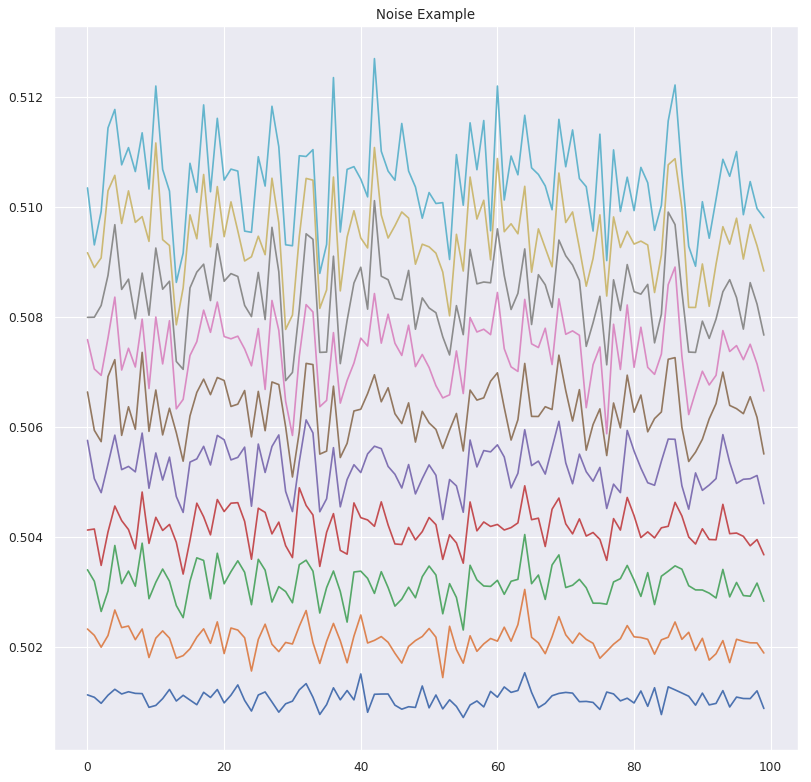

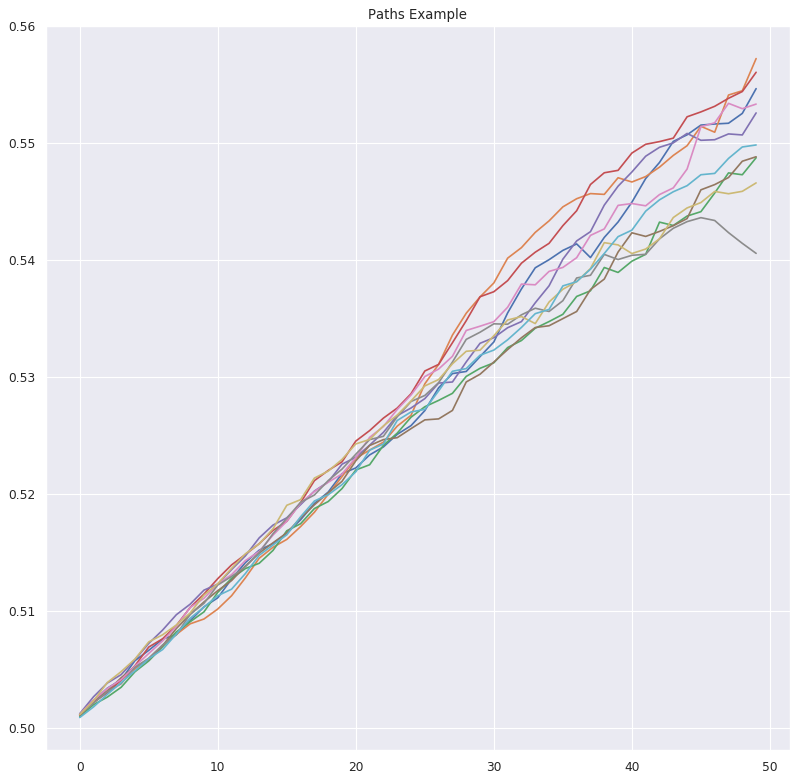

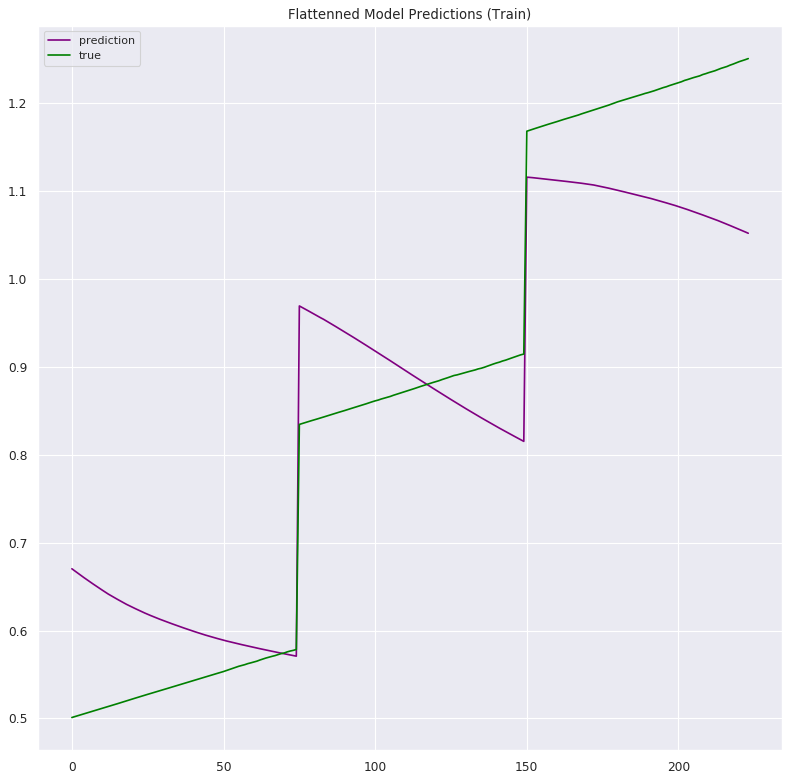

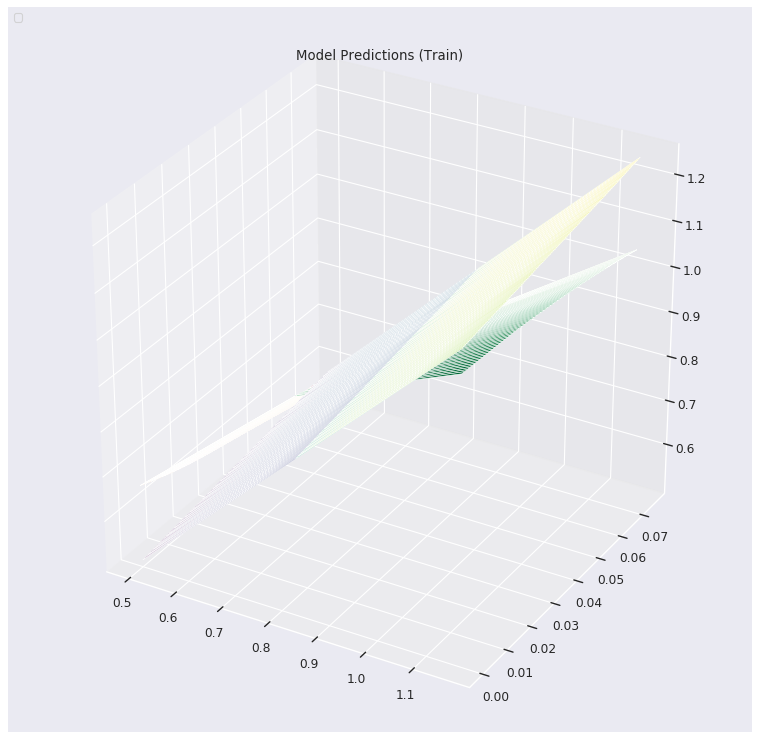

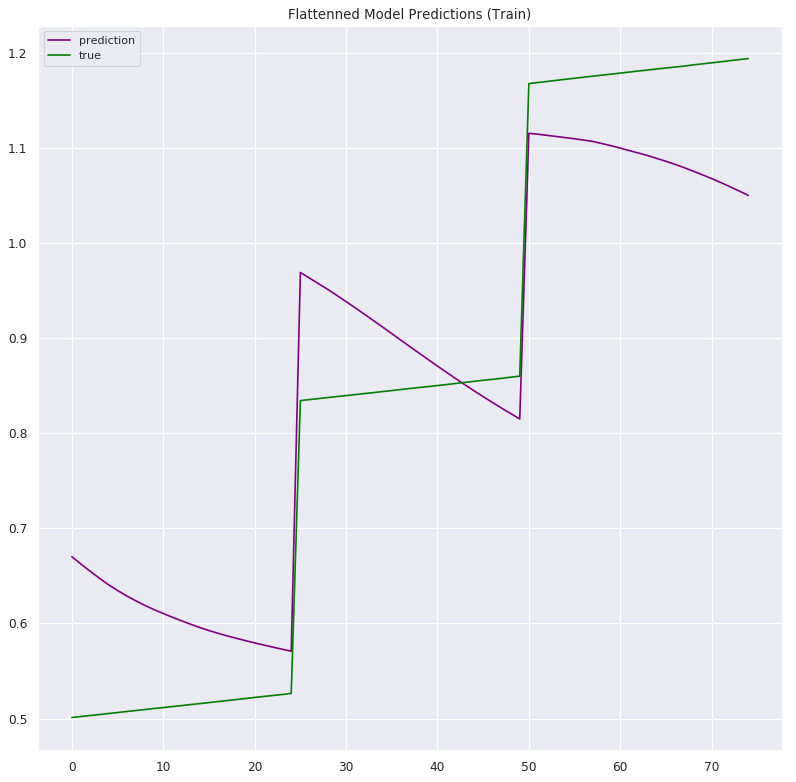

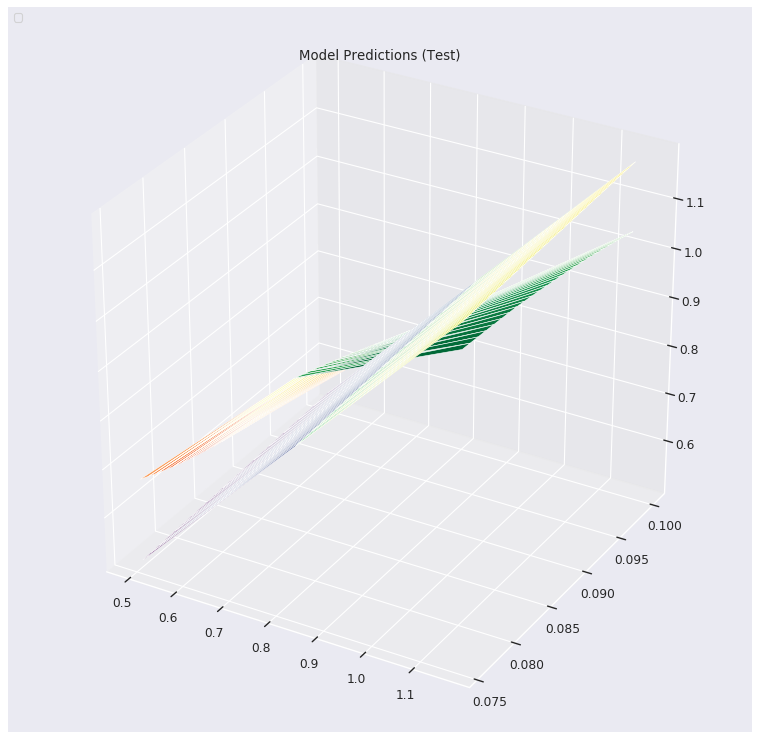

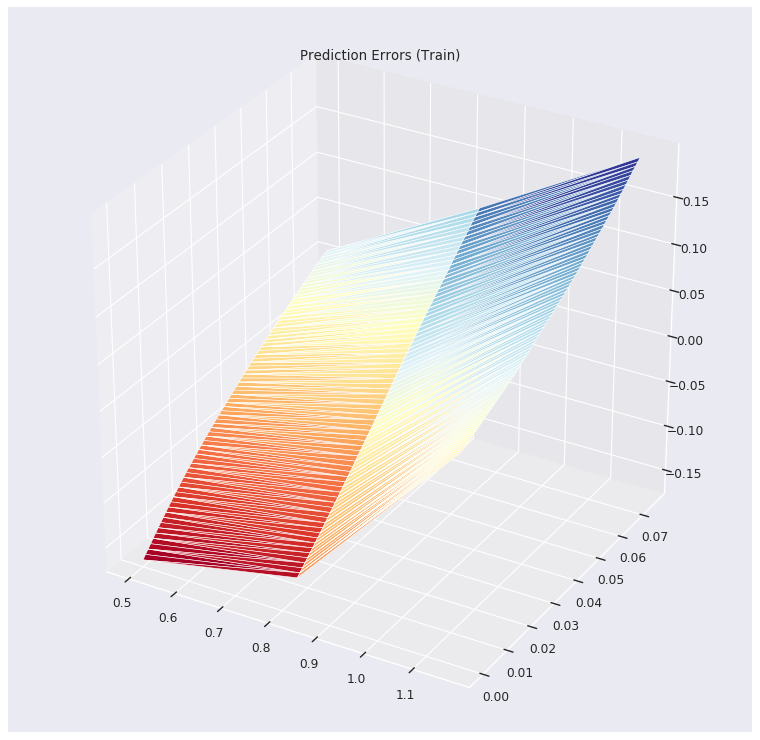

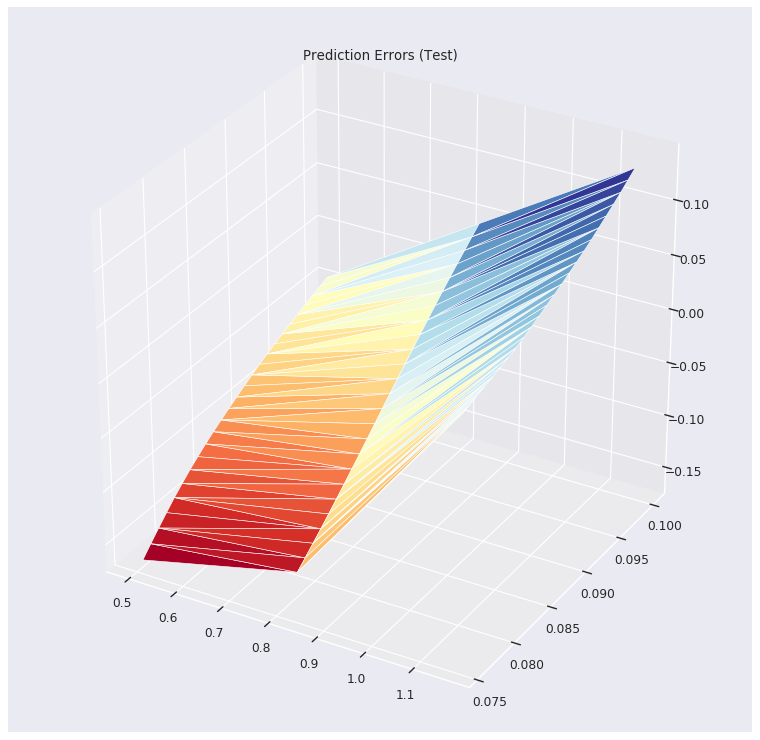

In [10]:
# Run Backend
# %run Universal_Processes_Trainer_Visuals.ipynb
exec(open('Universal_Processes_Trainer_Visuals.py').read())

## Update User
We empirically estimate the standard error and confidence intervals or the relevant error distributions using the method of this paper: [Bootstrap Methods for Standard Errors, Confidence Intervals, and Other Measures of Statistical Accuracy - by: B. Efron and R. Tibshirani ](https://www.jstor.org/stable/2245500?casa_token=w_8ZaRuo1qwAAAAA%3Ax5kzbYXzxGSWj-EZaC10XyOVADJyKQGXOVA9huJejP9Tt7fgMNhmPhj-C3WdgbB9AEZdqjT5q_azPmBLH6pDq61jzVFxV4XxqBuerQRBLaaOFKcyr0s&seq=1#metadata_info_tab_contents)

### Training-Set Performance

In [11]:
Type_A_Prediction

,W1,E[X']-E[X],(E[X'^2]-E[X^2])^.5,(E[X'^3]-E[X^3])^(1/3),(E[X'^4]-E[X^4])^.25
Min,0.018822,0.000211,1.989923e-08,0.073230,0.170772
MAE,0.043736,0.082477,3.639457e-02,0.587634,0.721311
Max,0.079817,0.198627,1.832663e-01,0.889922,1.011584


#### Predictions

In [15]:
Type_A_Predictions_and_confidence.T

,CL,Mean,CU
W1_99_Train,0.041863,0.043736,0.045795
W1error_99_Train,0.041202,0.043736,0.046755
M_95_Train,0.835460,0.862790,0.889108
M_99_Train,0.829671,0.862790,0.898726
MC_95_Train,0.838426,0.872638,0.909705
MC_99_Train,0.818058,0.872638,0.916785


### Test-Set Performance

In [13]:
Type_A_Prediction_test

,W1,E[X']-E[X],(E[X'^2]-E[X^2])^.5,(E[X'^3]-E[X^3])^(1/3),(E[X'^4]-E[X^4])^.25
Min,0.018822,0.002464,0.000004,0.303668,0.553195
MAE,0.043652,0.081183,0.028719,0.594464,0.728222
Max,0.079817,0.169131,0.086005,0.771938,0.895593


#### Predictions

In [16]:
Type_A_Predictions_and_confidence_test.T

,CL,Mean,CU
W1_99_Test,0.039985,0.043652,0.047210
W1error_99_Test,0.039451,0.043652,0.047951
M_95_Test,0.820093,0.863666,0.908863
M_99_Test,0.801908,0.863666,0.921751
MC_95_Test,0.788246,0.847259,0.911690
MC_99_Test,0.763682,0.847259,0.936255


---

---
# Fin
---

---